# Descriptive Statistics and Graphs

Let's use a toy example to illustrate how to compute a set of descriptive statistics of a single sample of data. This is part of what we called univariate analysis. 

### Example 1: Minutes to Complete a 5K Race

Suppose that we are intereseted in analyze the time for 20 runners to complete a 5k race. Let's simulate the data, which are the finish times of the 20 runners. 

In [14]:
# Let's load numpy and pandas
import numpy as np 
import pandas as pd

In [15]:
# Set seed so the random numbers will keep the same in any execution
np.random.seed(0)
# numpy.random.normal() method 
x = np.random.normal(35, 5, 20) 
Time=np.round(x,0)
# printing numbers 
print(f"Minutes to finish the race: {Time}") 

Minutes to finish the race: [44. 37. 40. 46. 44. 30. 40. 34. 34. 37. 36. 42. 39. 36. 37. 37. 42. 34.
 37. 31.]


In [16]:
# Check out the type of Time
type(Time)

numpy.ndarray

In [17]:
# Find the sample mean value
mean_value = np.mean(Time)
# Find the sample standard deviation
std_dev = round(np.std(Time,ddof=1),3)
print(f" The mean (average) number of minutes of the 20 runners is: {mean_value}") 
print(f" The standard devitaion is: {std_dev}") 

 The mean (average) number of minutes of the 20 runners is: 37.85
 The standard devitaion is: 4.295


In the function np.std(), the argument ddof is used to set the denominator in the standard deviation formular. 

The ddof parameter stands for "delta degrees of freedom." When set to 1, it modifies the denominator in the standard deviation formula from n to n-1, where n is the number of observations. 

This adjustment is used when calculating the standard deviation of a sample to provide an unbiased estimate of the population standard deviation. By default, ddof is 0, which calculates the population standard deviation.

In many cases, we may see or prefer to use a DataFrame. A DataFrame is a two-dimensional tabular data structure with labeled rows and columns. It appears as a spreadsheet, where each column hold values of a variable, and each row contains data from one individual (study unit). DataFrames are fundamental for data manipulation and analysis in both Python and R.

In [18]:
# Create ID's for runners to mark the rows
ID = list(range(1, 21))
# Create a data frame using the simulated time
data=pd.DataFrame(Time, index=ID, columns=["Time"])
print(data)

    Time
1   44.0
2   37.0
3   40.0
4   46.0
5   44.0
6   30.0
7   40.0
8   34.0
9   34.0
10  37.0
11  36.0
12  42.0
13  39.0
14  36.0
15  37.0
16  37.0
17  42.0
18  34.0
19  37.0
20  31.0


Instead of finding them one by one, we can use Pandas describe() function to compute several descriptive statistics.

In [19]:
print(data.describe())

            Time
count  20.000000
mean   37.850000
std     4.295346
min    30.000000
25%    35.500000
50%    37.000000
75%    40.500000
max    46.000000


Text(0, 0.5, 'Minutes')

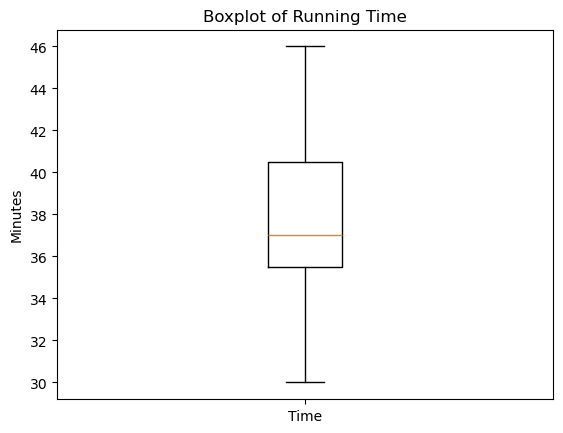

In [20]:
import matplotlib.pyplot as plt

plt.boxplot(Time, tick_labels=["Time"])

plt.title('Boxplot of Running Time')
plt.ylabel('Minutes')


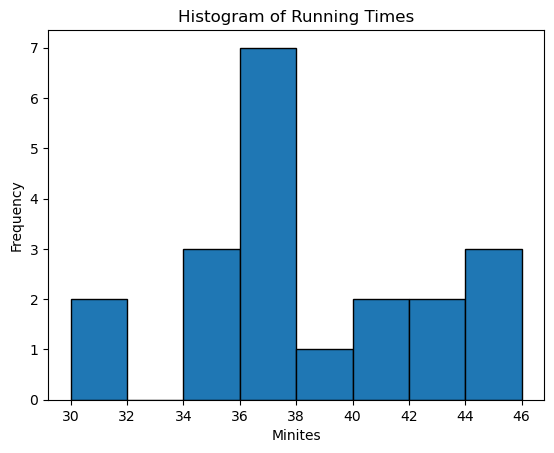

In [21]:
plt.hist(Time, bins=8, edgecolor='black')

plt.xlabel('Minites')
plt.ylabel('Frequency')
plt.title('Histogram of Running Times')

plt.show()

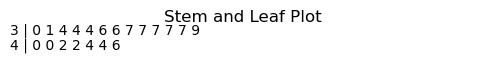

In [22]:
# 
def stem_leaf_plot(data):
    # Sort the data
    data.sort()
    
    # Determine stems and leaves
    stems = [str(x)[:1] if len(str(x)) > 1 else '0' for x in data]
    leaves = [str(x)[1] for x in data]
    
    # Group leaves by stem
    stem_leaf_dict = {}
    for i in range(len(stems)):
        stem = stems[i]
        leaf = leaves[i]
        if stem in stem_leaf_dict:
            stem_leaf_dict[stem].append(leaf)
        else:
            stem_leaf_dict[stem] = [leaf]
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(6, 0.2))
    
    y_position = len(stem_leaf_dict) -1
    for stem, leaves in stem_leaf_dict.items():
      ax.text(0, y_position, f"{stem} | {' '.join(leaves)}", ha='left', va='center')
      y_position -=1
    
    ax.set_title('Stem and Leaf Plot')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    plt.show()

stem_leaf_plot(Time)

In the above example, time to finish a 5K race takes mumerical values. Such a variable is called a quantitative variable. Next, we will examine a different type of variable that is called quanlitative variable, or sometimes categorical variable. We will use frequencies and relative frequencies to summarize this type of data.  

### Example 2 

Let's play another toy example to illustrate summarizing a categorical variable. 

In [23]:
import random

cate = ["Pizza","Pasta","Pinapple"]

random.seed(0) 
food = random.choices(cate, k=20)
print(food)

ID = list(range(1, 21))
data2=pd.DataFrame(food, index=ID, columns=["Food"])
print(data2)

['Pinapple', 'Pinapple', 'Pasta', 'Pizza', 'Pasta', 'Pasta', 'Pinapple', 'Pizza', 'Pasta', 'Pasta', 'Pinapple', 'Pasta', 'Pizza', 'Pinapple', 'Pasta', 'Pizza', 'Pinapple', 'Pinapple', 'Pinapple', 'Pinapple']
        Food
1   Pinapple
2   Pinapple
3      Pasta
4      Pizza
5      Pasta
6      Pasta
7   Pinapple
8      Pizza
9      Pasta
10     Pasta
11  Pinapple
12     Pasta
13     Pizza
14  Pinapple
15     Pasta
16     Pizza
17  Pinapple
18  Pinapple
19  Pinapple
20  Pinapple


Getting the summary table of frequencies and relative frequencies. If there are missing values, they can be taken care of by setting dropna= value. 

In [24]:
# Frequency counts
print(data2['Food'].value_counts())

# Proportions   
print(data2['Food'].value_counts(normalize=True))

# Including missing values   
print(data2['Food'].value_counts(dropna=False))

Food
Pinapple    9
Pasta       7
Pizza       4
Name: count, dtype: int64
Food
Pinapple    0.45
Pasta       0.35
Pizza       0.20
Name: proportion, dtype: float64
Food
Pinapple    9
Pasta       7
Pizza       4
Name: count, dtype: int64


Then let's get the graphs. 

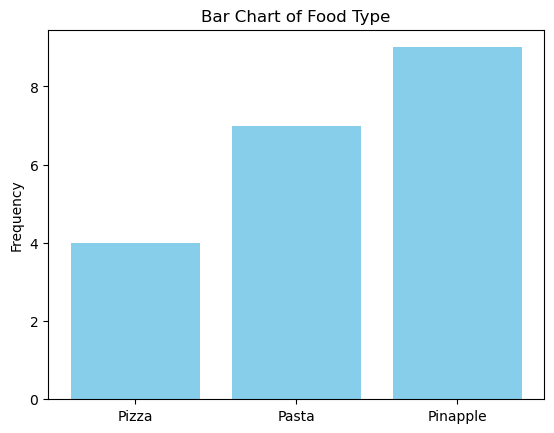

In [25]:
import matplotlib.pyplot as plt

values = [4, 7, 9]

# Creating the bar chart
plt.bar(cate, values, color='skyblue')

# Adding labels and title
plt.ylabel('Frequency')
plt.title('Bar Chart of Food Type')

# Displaying the chart
plt.show()


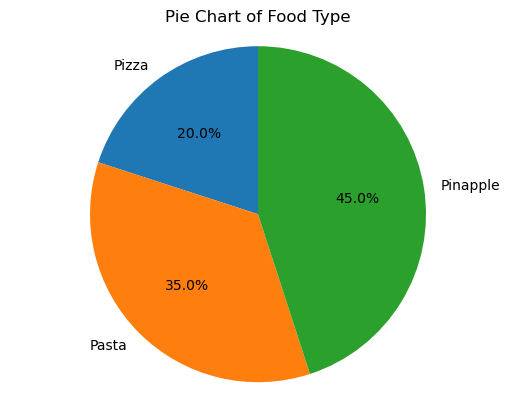

In [26]:
plt.pie(values, labels=cate, autopct='%1.1f%%', startangle=90)

plt.axis('equal')

# Adding a title
plt.title('Pie Chart of Food Type')

# Displaying the chart
plt.show()

### Example 3

We will borrow a dataset from R. First, we will import the .txt file. Then we will deal with a categorical variable from the set. Frequencies and relative frequencies are useful descriptive statistics in this case. A bar chart or a pie chart is a helpful graph to show the proportions of each category of such a variable. 

We will borrow a data set from R. You can find more information about the data set mtcars [here] (https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/mtcars)

In [27]:
# Import dataset 

cars = pd.read_csv('mtcars.txt', sep='\t')
print(cars.head())

    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2


Now, let's play the game of finding statistics and making graphs using this set of data. 

Can you find the descriptive statistics of the variable mpg? 

Can you find the descriptive statistics of cyl, treating cyl as a categorical variable? 

Can you make a histogram for mpg? a bar chart for cyl?

In [28]:
descriptive_stats = cars['mpg'].describe()
print(descriptive_stats)


count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64


In [29]:
print(cars['cyl'].value_counts())
  
print(cars['cyl'].value_counts(normalize=True))


cyl
8    14
4    11
6     7
Name: count, dtype: int64
cyl
8    0.43750
4    0.34375
6    0.21875
Name: proportion, dtype: float64


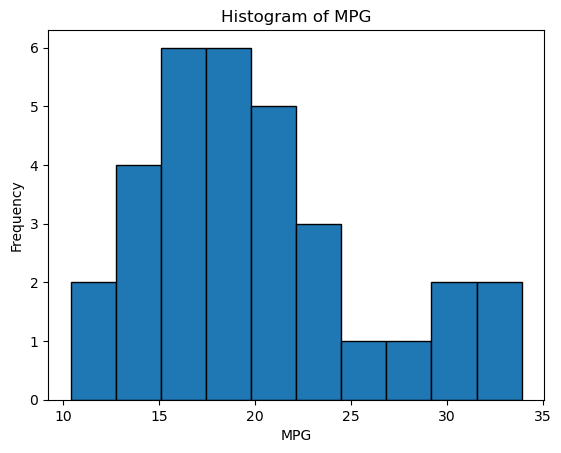

In [30]:
import matplotlib.pyplot as plt

plt.hist(cars['mpg'], edgecolor='black')

plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Histogram of MPG')

plt.show()

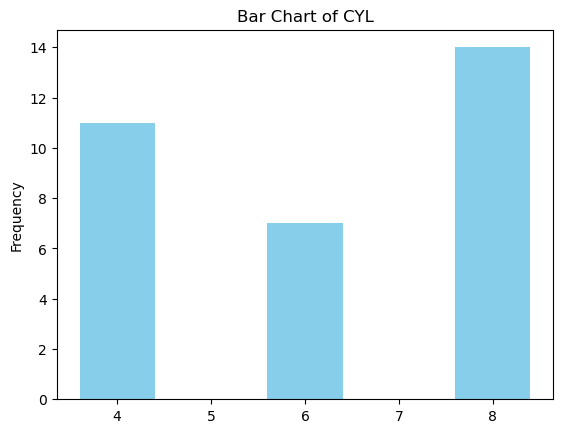

In [31]:
cyl_cate=[4,6, 8]
values = [11, 7, 14]

plt.bar(cyl_cate, values, color='skyblue')

plt.ylabel('Frequency')
plt.title('Bar Chart of CYL')

plt.show()